Project 2 proposal
Data source location:-
The Dataset is available for free download using the below link. https://data.london.gov.uk/dataset/number-international-visitors-london

Data source Discovery:-
I found this Dataset in one of the links provided in the Data sources in Blackboard. I went through a lot of other Datasets but I felt that this Dataset has interesting hypotheses around it and a lot of analysis can be done on it.

Legality and Cost:-
This Dataset is absolutely free to download and legal to access as well.

Documented EDA:-
There's no such EDA or Visualization available on the web for this Dataset.

Project Proposal:-
The size of this Dataset is 6005 KB with 11 columns and 61463 rows and this file with these many records fits perfectly into the Data 601 Objectives of Project-2. A lot of good questions can be asked about this data

For Example some Hypothesis about which we are going to Analyse are:-

1: Does the mode of transportation have a significant effect on the amount spent during the stay?
2: Does the purpose of travel have a significant effect on the number of nights spent?
3: Does the area of the visit have a significant effect on the number of visits and nights spent?
4: Does London see more visitors in Quarter 4?(Oct-Dec)


In [1]:
#Import the required packages that are required for doing analysis
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Read the data from the csv using the download link into a Dataframe directly
visitors_data = pd.read_csv(r"https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv", engine='python', encoding='iso-8859-1')
print('(Number of rows, Columns)')
visitors_data.shape

(Number of rows, Columns)


(61462, 11)

In [2]:
#checking for null values
visitors_data.isnull().sum()

year             0
quarter          0
market           0
dur_stay         0
mode             0
purpose          0
area             0
Visits (000s)    0
Spend (£m)       0
Nights (000s)    0
sample           0
dtype: int64

In [3]:
visitors_data.head(10)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1
5,2002,January-March,Belgium,1-3 nights,Sea,Miscellaneous,LONDON,0.590807,0.003953,1.772420,1
6,2002,January-March,Belgium,1-3 nights,Tunnel,Holiday,LONDON,10.940251,2.765473,23.242688,30
7,2002,January-March,Belgium,1-3 nights,Tunnel,Business,LONDON,6.052632,1.446697,10.428555,16
8,2002,January-March,Belgium,1-3 nights,Tunnel,VFR,LONDON,5.559403,0.468140,9.441416,13
9,2002,January-March,Belgium,1-3 nights,Tunnel,Miscellaneous,LONDON,0.704948,0.465721,1.409894,2


There are no null values in the dataset

In [4]:
visitors_data.tail(10)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
61452,2020P,January-March,Other Africa,1-3 nights,Air,Business,LONDON,1.885880,1.226172,6.342901,3
61453,2020P,January-March,Other Africa,1-3 nights,Air,VFR,LONDON,4.740163,3.383228,40.903962,3
61454,2020P,January-March,Other Africa,4-7 nights,Air,Holiday,LONDON,2.379792,1.338668,10.355347,2
61455,2020P,January-March,Other Africa,4-7 nights,Air,Business,LONDON,0.683238,0.556839,4.099428,1
61456,2020P,January-March,Other Africa,4-7 nights,Air,VFR,LONDON,4.822673,4.259258,66.684035,6
61457,2020P,January-March,Other Africa,4-7 nights,Air,Miscellaneous,LONDON,1.695331,1.103167,8.831038,2
61458,2020P,January-March,Other Africa,8-14 nights,Air,Holiday,LONDON,1.486972,2.022254,7.836555,1
61459,2020P,January-March,Other Africa,8-14 nights,Air,VFR,LONDON,2.416554,1.847152,63.894432,2
61460,2020P,January-March,Other Africa,15+ nights,Air,Holiday,LONDON,2.472653,1.006109,35.080377,2
61461,2020P,January-March,Other Africa,15+ nights,Air,VFR,LONDON,4.124325,3.960705,134.909755,4


In [5]:
#Check for unique values for each column
visitors_data.nunique()

year                19
quarter              4
market              62
dur_stay             4
mode                 3
purpose              5
area                 1
Visits (000s)    55965
Spend (£m)       60614
Nights (000s)    60368
sample             195
dtype: int64

Hypothesis which we are going to analyse are:-

Visitors travelling from certain modes of travles are spending more per trip than visitors from other modes.

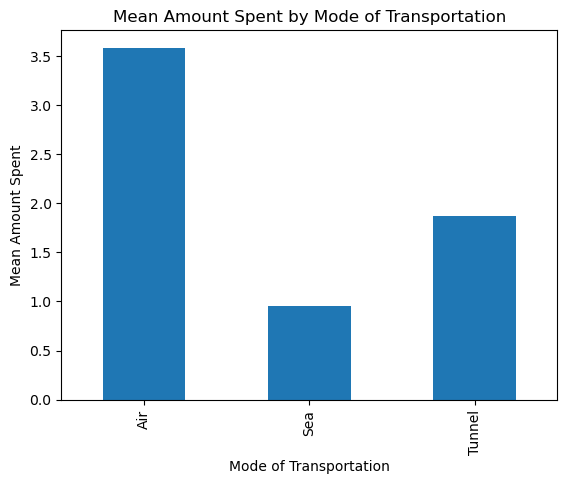

In [6]:
# Create a bar plot of mean amount spent by transportation mode
visitors_data.groupby('mode')['Spend (£m)'].mean().plot(kind='bar')

# Add plot labels and title
plt.xlabel('Mode of Transportation')
plt.ylabel('Mean Amount Spent')
plt.title('Mean Amount Spent by Mode of Transportation')

# Show the plot
plt.show()


Visitors who come by air tend to spend more compared to visitors who come by other modes of transportation.

Is it possible that visitors who come to London for leisure purposes might stay longer than those who come for business or other reasons?

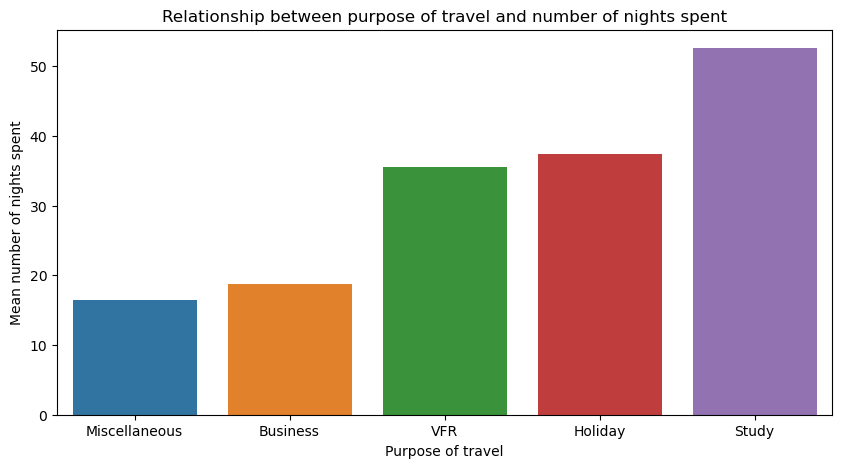

In [7]:
# Group the dataframe by purpose and calculate the mean number of nights spent
mean_nights_by_purpose = visitors_data.groupby('purpose').mean()

# Sort the dataframe by mean number of nights spent
mean_nights_by_purpose = mean_nights_by_purpose.sort_values('Nights (000s)')

# Create a bar chart of mean number of nights spent by purpose
plt.figure(figsize=(10,5))
sns.barplot(data=mean_nights_by_purpose, x=mean_nights_by_purpose.index, y='Nights (000s)')
plt.xlabel('Purpose of travel')
plt.ylabel('Mean number of nights spent')
plt.title('Relationship between purpose of travel and number of nights spent')
plt.show()

From the data we conclude that visitors who came to study spent significantly more nights in London than those who came for leisure or business. It seemed that the excitement of learning about a new culture and the desire to fully experience it led to longer stays for this group of visitors.

Can the market influence the number of visits and duration of stays significantly?

<Figure size 1200x800 with 0 Axes>

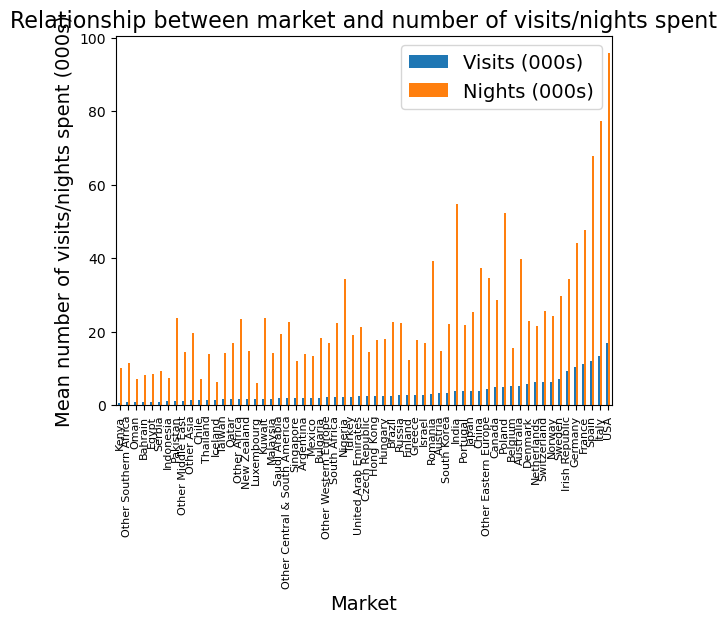

In [8]:
# Group the data by market and calculate mean number of visits and nights spent
mean_visits_nights_by_market = visitors_data.groupby('market').mean()[['Visits (000s)', 'Nights (000s)']]

# Sort the data by mean number of visits
mean_visits_nights_by_market = mean_visits_nights_by_market.sort_values('Visits (000s)')

# Create a bar plot of mean number of visits and nights spent by market
plt.figure(figsize=(12, 8))
# fig, ax = plt.subplots(figsize=(12, 8))

ax = mean_visits_nights_by_market.plot(kind='bar')
ax.set_xticklabels(mean_visits_nights_by_market.index, fontsize=12)
ax.set_xlabel('Market', fontsize=14)
ax.set_ylabel('Mean number of visits/nights spent (000s)', fontsize=14)
ax.legend(fontsize=14)
plt.tick_params(axis='x', which='major', labelsize=8)

plt.title('Relationship between market and number of visits/nights spent', fontsize=16)
plt.show()


We observed that visitors from markets that are geographically closer to London tend to make shorter visits. Visitors from France, for instance, are among the top markets in terms of the number of visits, but their duration of stay is shorter compared to visitors from other non-EU countries.

Correcting the data in year column

In [9]:
visitors_data['year'].replace({'2020P':'2020'}, inplace = True)


The number of visitors to London is affected by seasonality, with more visitors during certain quarters of the year.

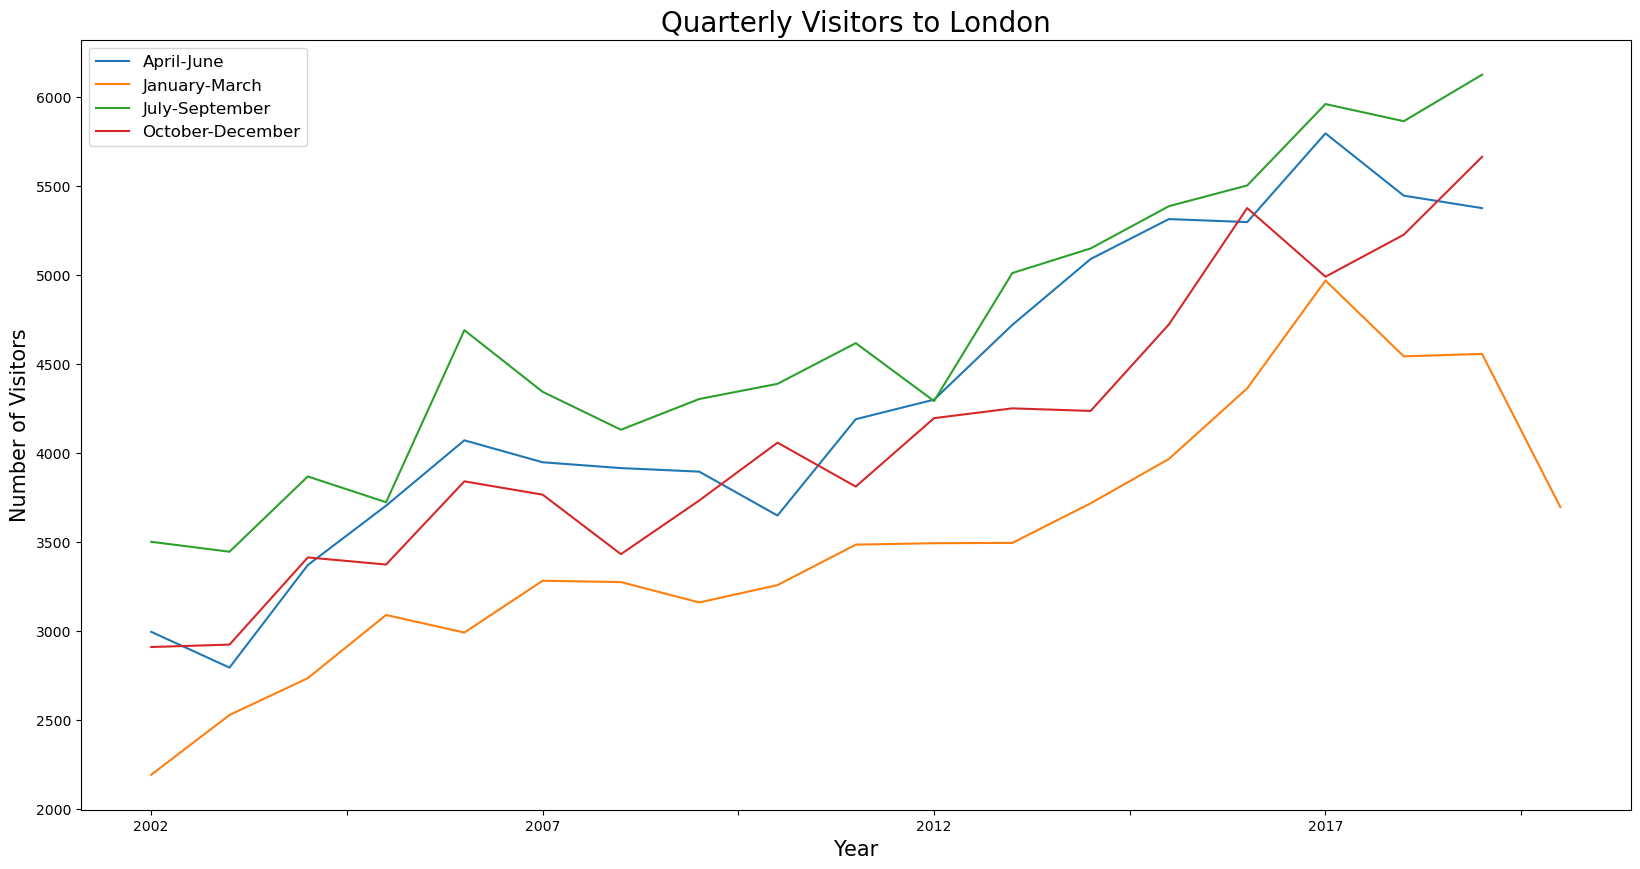

In [10]:
# group visitor data by year and quarter and count the number of visits
visits_by_quarter = visitors_data.groupby(['year', 'quarter']).sum()['Visits (000s)']

# plot line graph of visits by quarter for each year
ax = visits_by_quarter.unstack().plot(kind='line', figsize=(20, 10))

# set titles, x and y labels, and legend
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Visitors', fontsize=15)
ax.set_title('Quarterly Visitors to London', fontsize=20)
ax.legend(fontsize=12)

# display the plot
plt.show()

The weather in London is usually pleasant during the summer months, which attracts more tourists so we can see more number of tourists in summer.

Does tourism get affected during an economic recession?

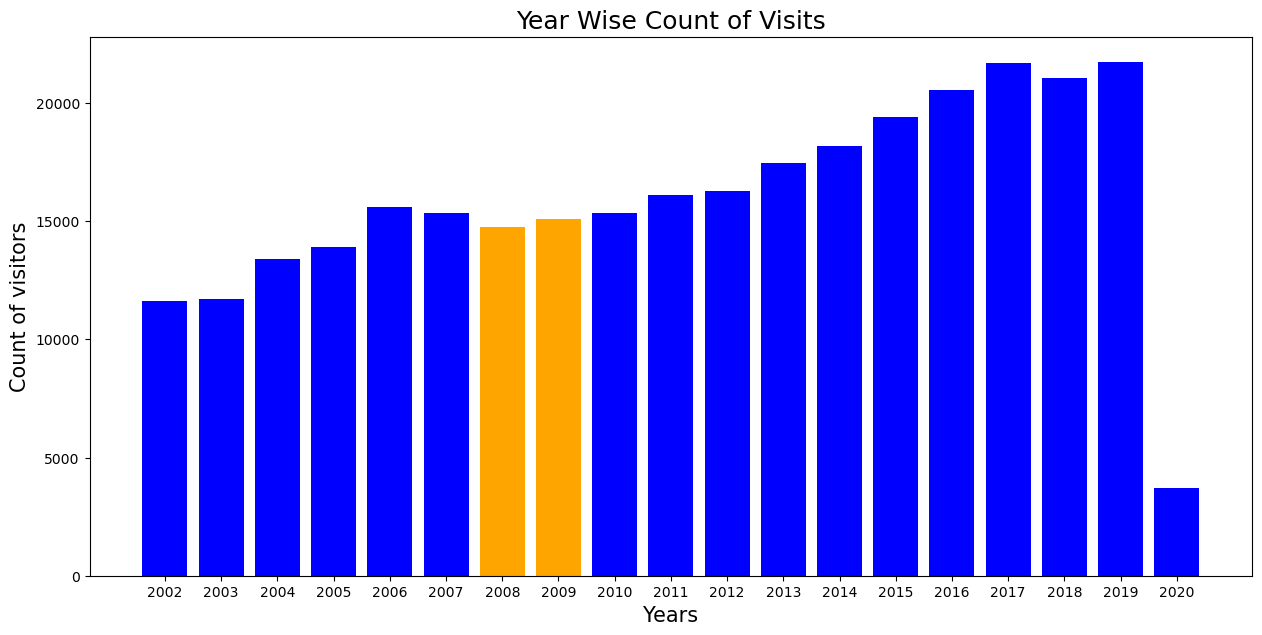

In [11]:
#Group by year and count the number of visits
Year_wise_count=visitors_data.groupby(['year']).sum()['Visits (000s)']

plt.figure(figsize=(15,7))

recession_years=['2008','2009']

#To plot different color for recession years
for i,v in Year_wise_count.iteritems():
    if i in recession_years:
        plt.bar(i,v,color='orange')
    else:
        plt.bar(i,v,color='blue')

#Setting the titles, x and y labels        
plt.xlabel('Years', fontsize=15)
plt.ylabel('Count of visitors', fontsize=15)
plt.title('Year Wise Count of Visits', fontsize=18)

plt.show()

This data suggests that while economic recessions may have a temporary impact on tourism, destinations like London have the resilience to recover and continue attracting visitors.

London is one of the most popular tourist destinations in the world, attracting millions of visitors every year. But what are the primary reasons that people come to this city? Is it for leisure or business-related purposes or some other purpose?

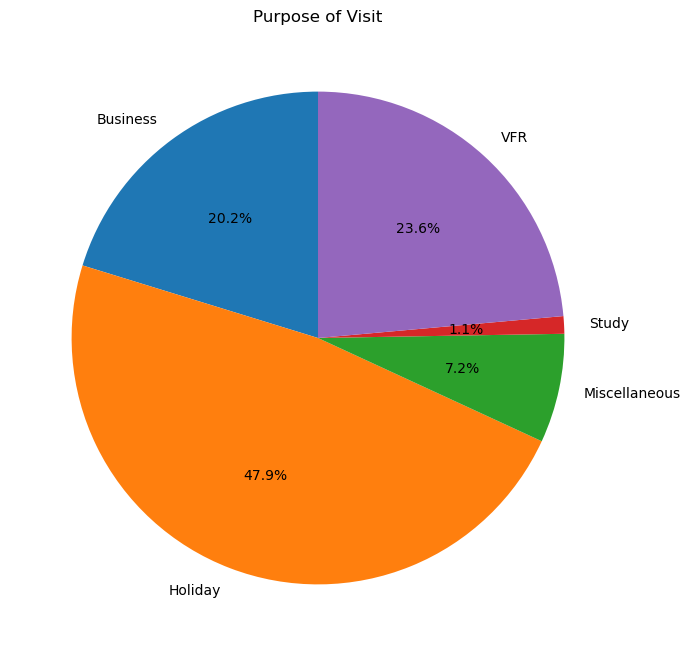

In [12]:
# Group by purpose and count the number of visits
purpose_counts = visitors_data.groupby(['purpose']).sum()['Visits (000s)']

# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(purpose_counts.values, labels=purpose_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Purpose of Visit')
plt.show()

It is apparent that a greater number of individuals are visiting for leisure purposes rather than business-related reasons.

Is London a primary destination for people from European countries?

<AxesSubplot:>

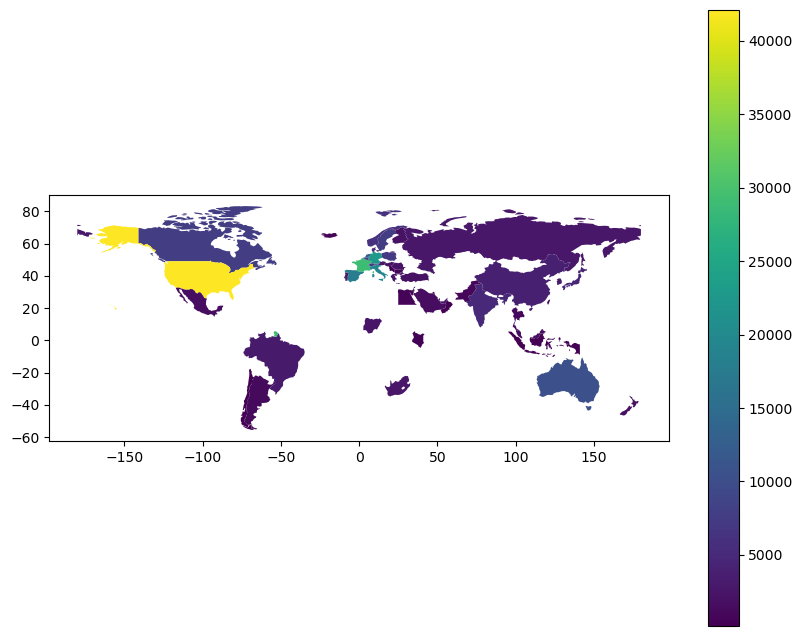

In [13]:
import geopandas as gpd

# group data by country and sum the number of visits
country_data = visitors_data.groupby('market')['Visits (000s)'].sum().reset_index()

# read in shapefile for world map
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# rename United States of America to USA to match the world map data
country_data = country_data.replace('USA', 'United States of America')

# merge country data with world map based on country name
merged_data = world_map.merge(country_data, left_on='name', right_on='market')

# create geoplot of total visits by country
merged_data.plot(column='Visits (000s)', legend=True, figsize=(10, 8))


In [14]:
merged_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,market,Visits (000s)
0,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7639.987276
1,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,42078.694861
2,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,270.124722
3,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,1260.366008
4,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",Chile,326.558838


No, it is not accurate to say that more people visiting London are from European countries. Instead, it is suggested that more visitors to London are from the United States.
While European visitors are certainly an important market for London, they are not the only ones. The city's appeal to visitors from all corners of the world continues to grow, making it a truly global destination.

The effect of the purpose of visit on the mode of transport used by visitors to London.

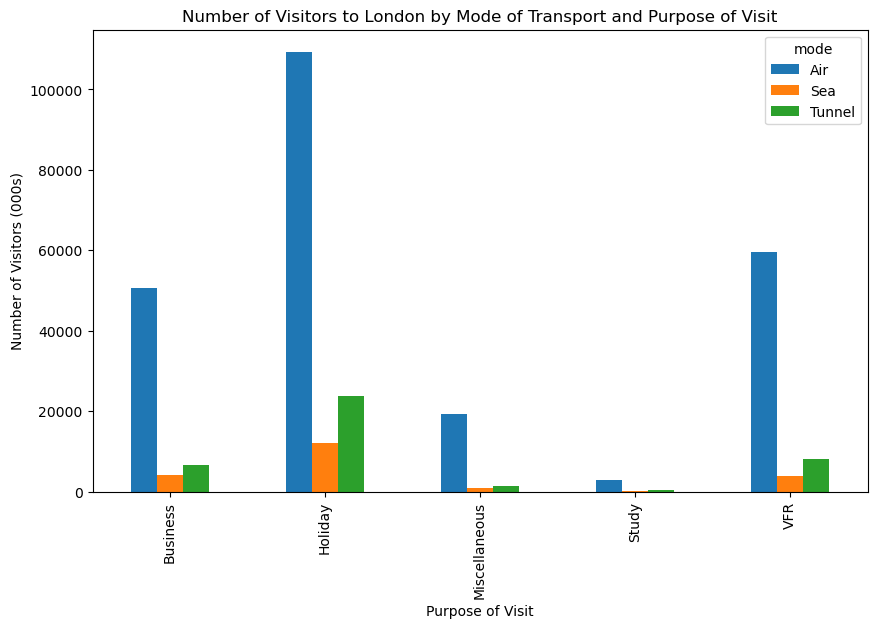

In [19]:
# Select the relevant columns
df = visitors_data[['mode', 'purpose', 'Visits (000s)']]

# Pivot the data to get the total number of visitors by mode of transport and purpose of visit
pivot_df = pd.pivot_table(df, values='Visits (000s)', index='purpose', columns='mode', aggfunc=sum)

# Create the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Visitors to London by Mode of Transport and Purpose of Visit')
plt.xlabel('Purpose of Visit')
plt.ylabel('Number of Visitors (000s)')
plt.show()

According to the data, air transportation is the most popular means of travel for people visiting London, regardless of the reason for their visit. This indicates that people value the speed and convenience that air travel offers, allowing them to quickly and efficiently get to their destination.

The impact of Brexit on tourism, check whether the UK's decision to leave the European Union has had an impact on the number of visitors to London?

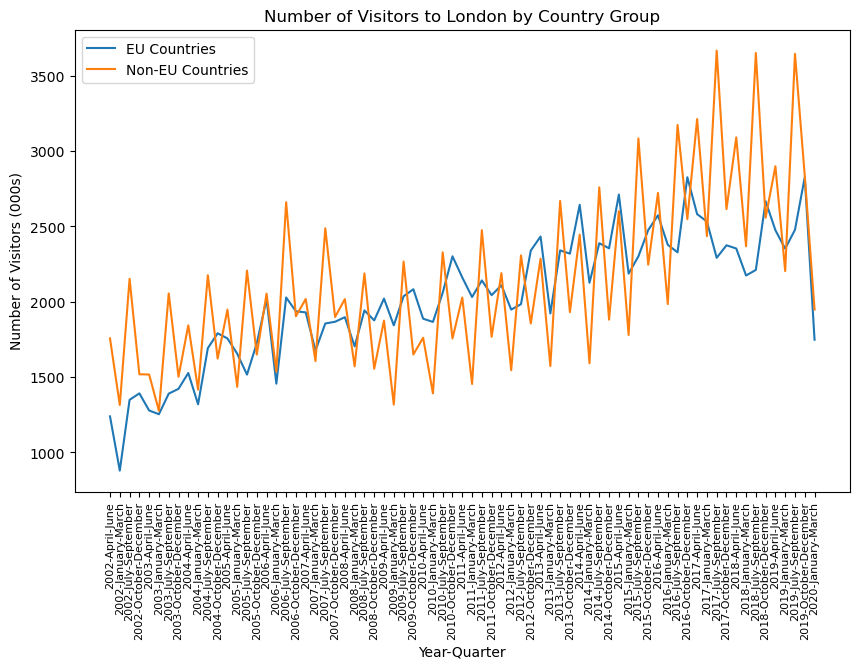

In [20]:
# Filter data for EU and non-EU countries
eu_data = visitors_data.loc[visitors_data['market'].isin(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'])]
non_eu_data = visitors_data.loc[~visitors_data['market'].isin(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'])]

# Aggregate data by year and quarter
eu_data_agg = eu_data.groupby(['year', 'quarter'])['Visits (000s)'].sum().reset_index()
non_eu_data_agg = non_eu_data.groupby(['year', 'quarter'])['Visits (000s)'].sum().reset_index()

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(eu_data_agg['year'].astype(str) + '-' + eu_data_agg['quarter'], eu_data_agg['Visits (000s)'], label='EU Countries')
plt.plot(non_eu_data_agg['year'].astype(str) + '-' + non_eu_data_agg['quarter'], non_eu_data_agg['Visits (000s)'], label='Non-EU Countries')
plt.xticks(rotation=90, fontsize=8)
plt.title('Number of Visitors to London by Country Group')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Visitors (000s)')
plt.legend()
plt.show()


Brexit has had a noticeable impact on London's tourism industry. The uncertainty surrounding the UK's future relationship with the European Union, along with the depreciation of the pound, has made the UK a less attractive destination for foreign tourists.While Brexit may have had some short-term impacts on the tourism industry in the UK, it seems that the industry has been able to adapt and recover relatively quickly. 

The rate of increase in the number of visitors from countries outside the European Union is greater than the rate of increase in the number of visitors from countries within the European Union.

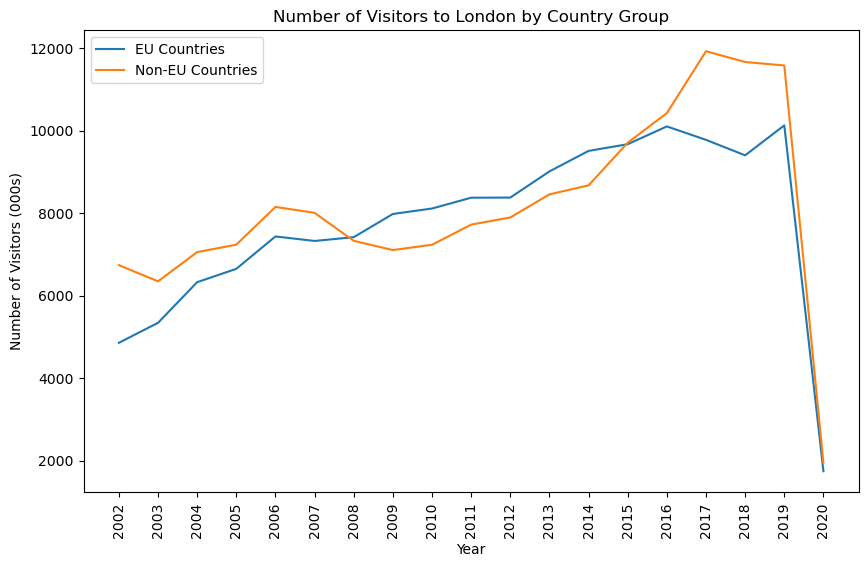

In [21]:
# Filter data for EU and non-EU countries
eu_data = visitors_data.loc[visitors_data['market'].isin(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'])]
non_eu_data = visitors_data.loc[~visitors_data['market'].isin(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'])]

# Aggregate data by year
eu_data_agg = eu_data.groupby('year')['Visits (000s)'].sum().reset_index()
non_eu_data_agg = non_eu_data.groupby('year')['Visits (000s)'].sum().reset_index()

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(eu_data_agg['year'], eu_data_agg['Visits (000s)'], label='EU Countries')
plt.plot(non_eu_data_agg['year'], non_eu_data_agg['Visits (000s)'], label='Non-EU Countries')
plt.xticks(rotation=90)
plt.title('Number of Visitors to London by Country Group')
plt.xlabel('Year')
plt.ylabel('Number of Visitors (000s)')
plt.legend()
plt.show()


The data is uniformly distributed sometimes more for non-EU countries and some times more for EU coutries